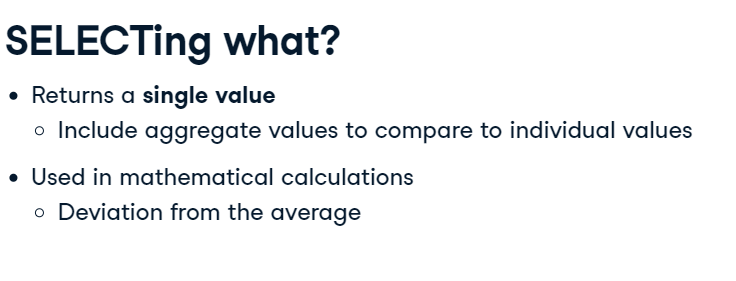
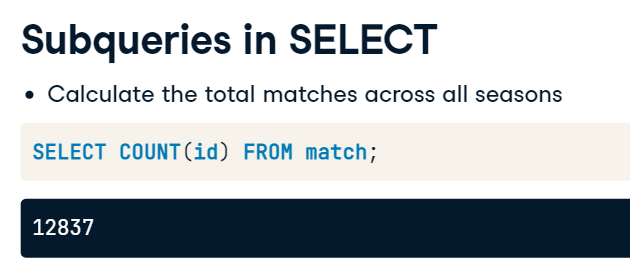
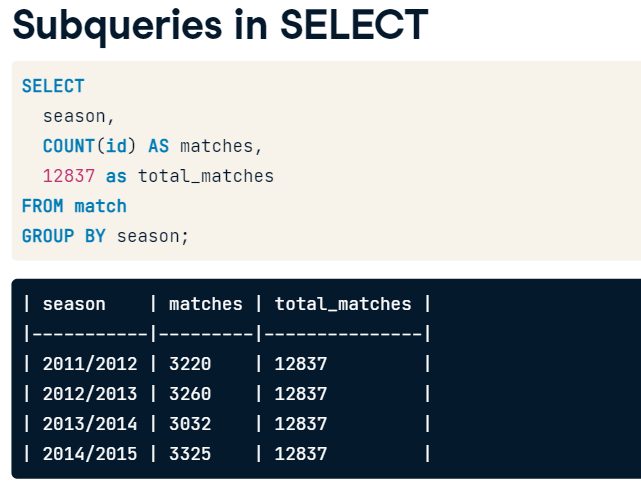
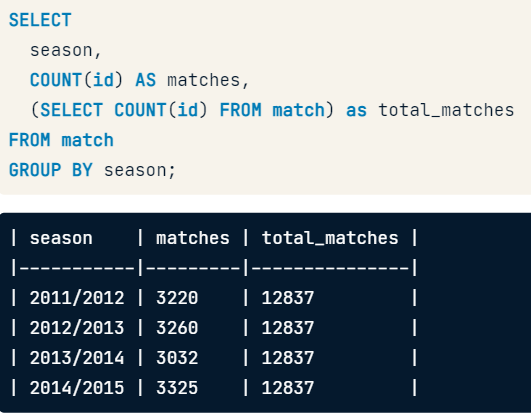
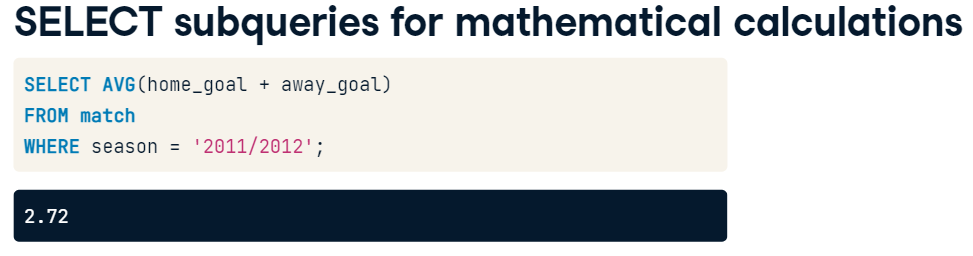
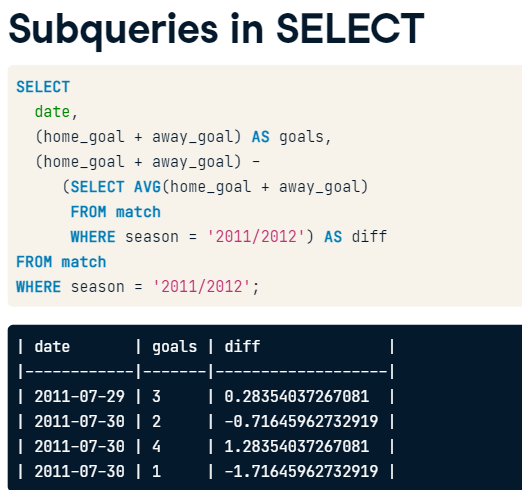
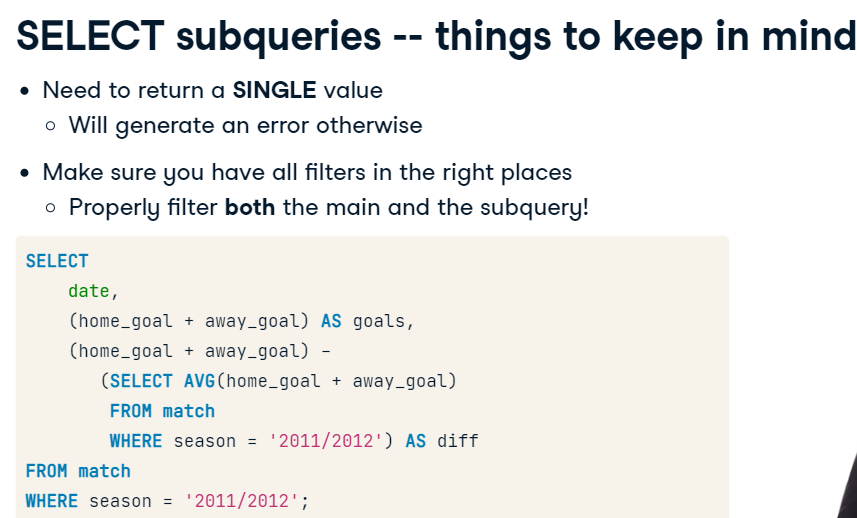
#### Add a subquery to the SELECT clause
Subqueries in SELECT statements generate a single value that allow you to pass an aggregate value down a data frame. This is useful for performing calculations on data within your database.

In the following exercise, you will construct a query that calculates the average number of goals per match in each country's league.

- In the subquery, select the average total goals by adding home_goal and away_goal.
- Filter the results so that only the average of goals in the 2013/2014 season is calculated.
- In the main query, select the average total goals by adding home_goal and away_goal. This calculates the average goals for each league.
- Filter the results in the main query the same way you filtered the subquery. Group the query by the league name.

```sql
SELECT 
	l.name AS league,
    -- Select and round the league's total goals
    ROUND(AVG(m.home_goal + m.away_goal),2) AS avg_goals,
    -- Select and round the average total goals
    (SELECT ROUND(AVG(home_goal + away_goal),2) 
     FROM match
     WHERE season = '2013/2014') AS overall_avg
FROM league AS l
LEFT JOIN match AS m
ON l.country_id = m.country_id
-- Filter for the 2013/2014 season
WHERE m.season = '2013/2014'
GROUP BY l.name;
```
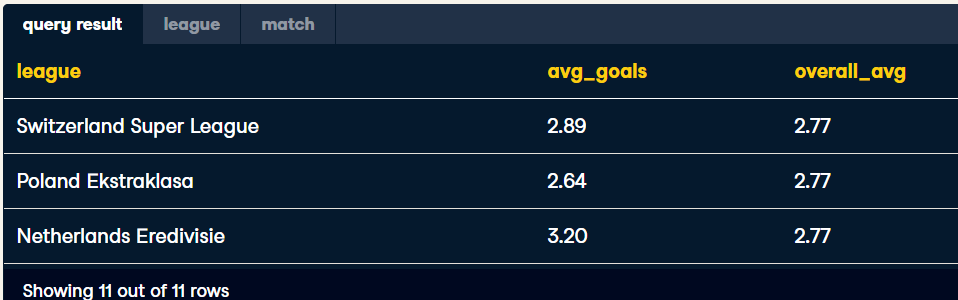

#### Subqueries in Select for Calculations
Subqueries in SELECT are a useful way to create calculated columns in a query. A subquery in SELECT can be treated as a single numeric value to use in your calculations. When writing queries in SELECT, it's important to remember that filtering the main query does not filter the subquery -- and vice versa.

In the previous exercise, you created a column to compare each league's average total goals to the overall average goals in the 2013/2014 season. In this exercise, you will add a column that directly compares these values by subtracting the overall average from the subquery.

- Select the average goals scored in a match for each league in the main query.
- Select the average goals scored in a match overall for the 2013/2014 season in the subquery.
- Subtract the subquery from the average number of goals calculated for each league.
- Filter the main query so that only games from the 2013/2014 season are included.

```sql
SELECT 
	-- Select the league name and average goals scored
	l.name AS league,
	ROUND(AVG(m.home_goal + m.away_goal),2) AS avg_goals,
    -- Subtract the overall average from the league average
	ROUND(AVG(m.home_goal + m.away_goal) - 
          (SELECT AVG(home_goal + away_goal)
           FROM match 
           WHERE season = '2013/2014'),2) AS diff
FROM league AS l
LEFT JOIN match AS m
ON l.country_id = m.country_id
-- Only include 2013/2014 results
WHERE m.season = '2013/2014'
GROUP BY l.name;
```
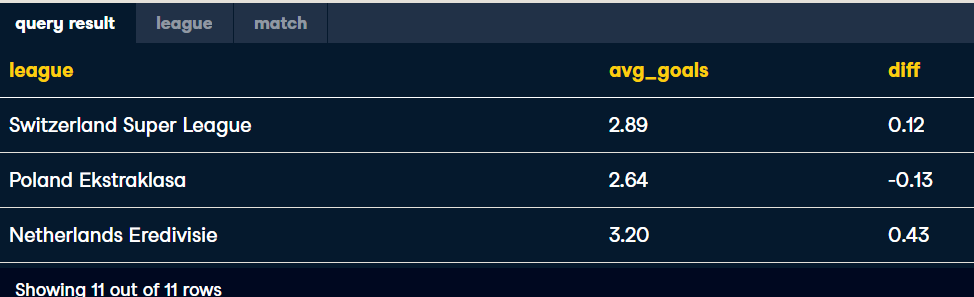

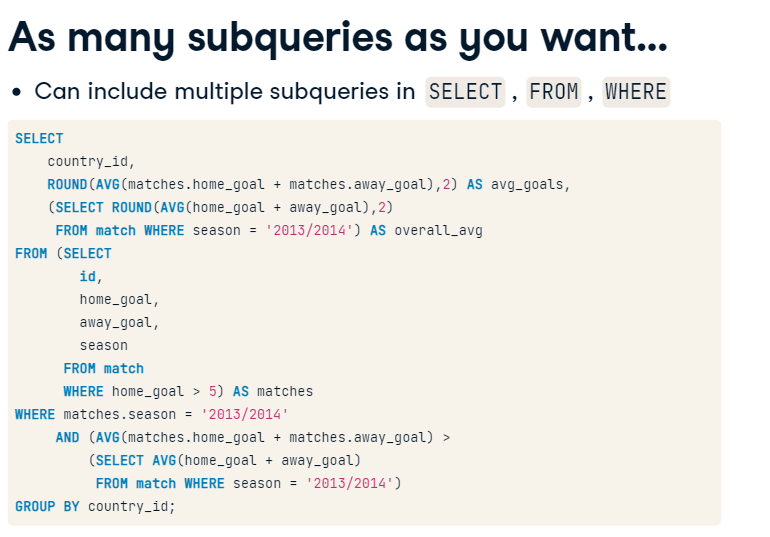

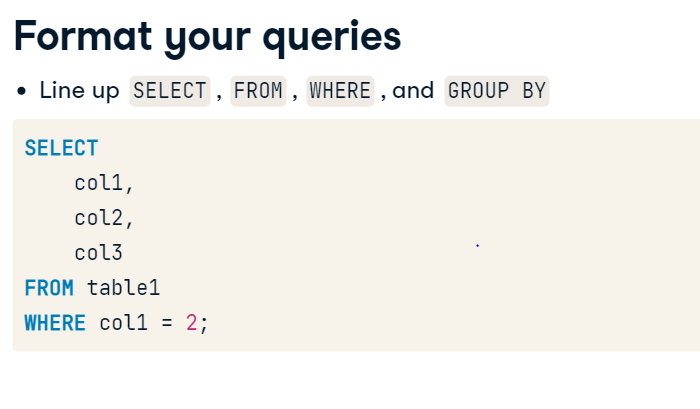
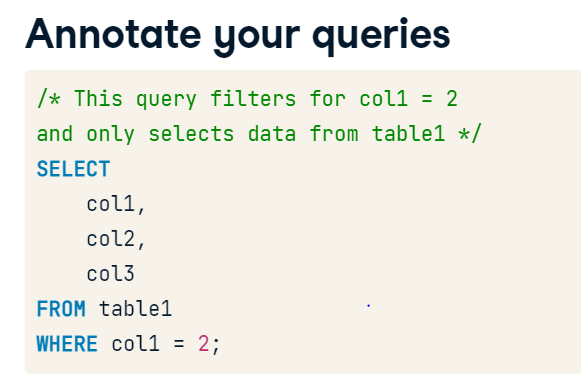
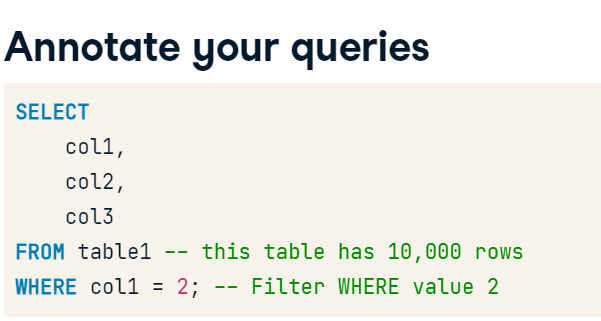
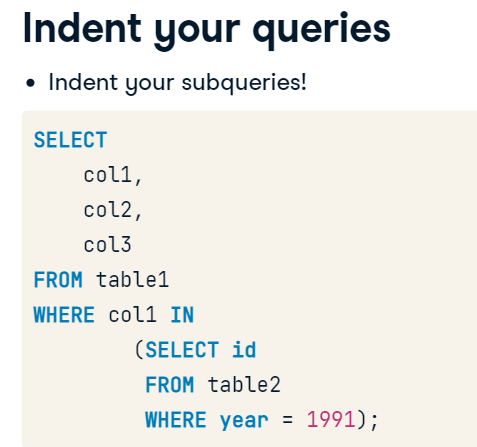
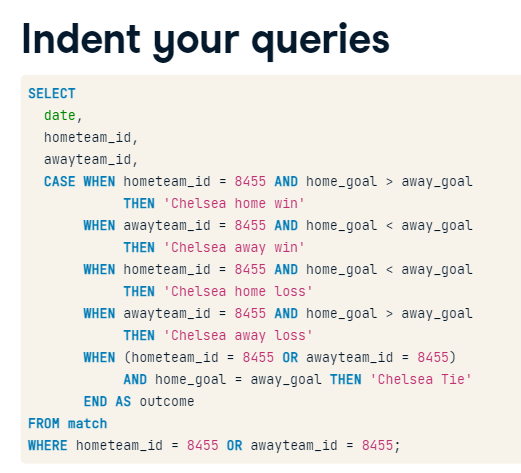
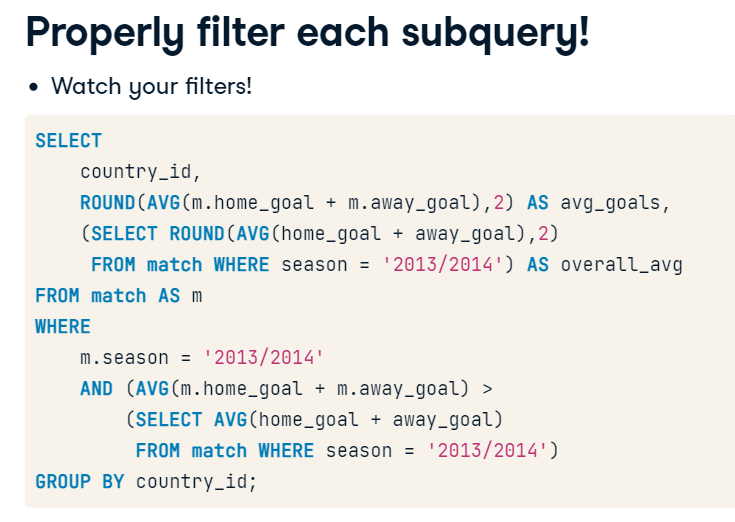

#### ALL the subqueries EVERYWHERE
In soccer leagues, games are played at different stages. Winning teams progress from one stage to the next, until they reach the final stage. In each stage, the stakes become higher than the previous one. The match table includes data about the different stages that each match took place in.

In this lesson, you will build a final query across 3 exercises that will contain three subqueries -- one in the SELECT clause, one in the FROM clause, and one in the WHERE clause. In the final exercise, your query will extract data examining the average goals scored in each stage of a match. Does the average number of goals scored change as the stakes get higher from one stage to the next?

- Extract the average number of home and away team goals in two SELECT subqueries.
- Calculate the average home and away goals for the specific stage in the main query.
- Filter both subqueries and the main query so that only data from the 2012/2013 season is included.
- Group the query by the m.stage column.

```sql
SELECT 
	-- Select the stage and average goals for each stage
	m.stage,
	ROUND(AVG(m.home_goal + m.away_goal),2) AS avg_goals,
    -- Select the average overall goals for the 2012/2013 season
	ROUND((SELECT AVG(home_goal + away_goal) 
           FROM match 
           WHERE season = '2012/2013'),2) AS overall
FROM match AS m
-- Filter for the 2012/2013 season
WHERE m.season = '2012/2013'
-- Group by stage
GROUP BY m.stage;
```
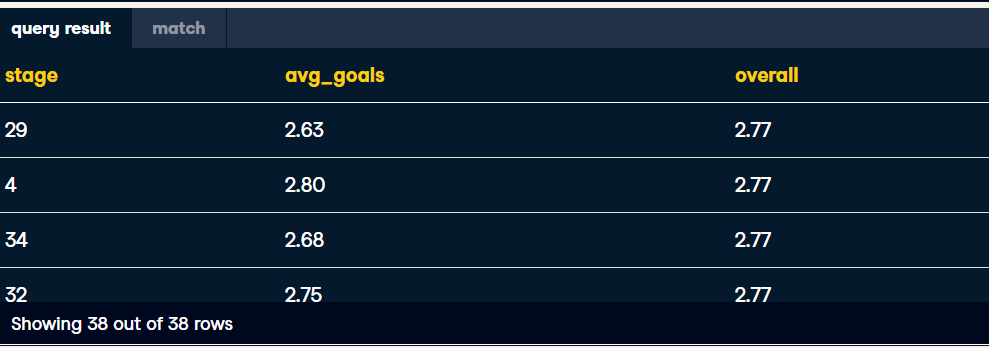


#### Add a subquery in FROM
In the previous exercise, you created a data set listing the average home and away goals in each match stage of the 2012/2013 match season.

In this next step, you will turn the main query into a subquery to extract a list of stages where the average home goals in a stage is higher than the overall average for home goals in a match.

- Calculate the average home goals and average away goals from the match table for each stage in the FROM clause subquery.
- Add a subquery to the WHERE clause that calculates the overall average home goals.
- Filter the main query for stages where the average home goals is higher than the overall average.
- Select the stage and avg_goals columns from the s subquery into the main query.

```sql
SELECT 
	-- Select the stage and average goals from the subquery
	s.stage,
    ROUND(s.avg_goals,2) AS avg_goals
FROM 
	-- Select the stage and average goals in 2012/2013
	(SELECT
         stage,
         AVG(home_goal + away_goal) AS avg_goals
     FROM match
     WHERE season = '2012/2013'
     GROUP BY stage) AS s
WHERE 
	-- Filter the main query using the subquery
	s.avg_goals > (SELECT AVG(home_goal + away_goal) 
                   FROM match WHERE season = '2012/2013');
```
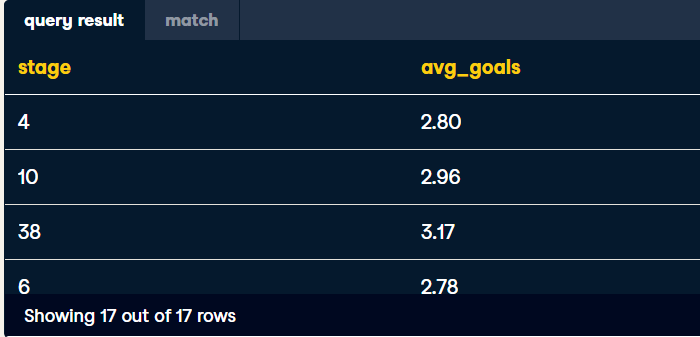

#### Add a subquery in SELECT
In the previous exercise, you added a subquery to the FROM statement and selected the stages where the number of average goals in a stage exceeded the overall average number of goals in the 2012/2013 match season. In this final step, you will add a subquery in SELECT to compare the average number of goals scored in each stage to the total.


- Create a subquery in SELECT that yields the average goals scored in the 2012/2013 season. Name the new column overall_avg.
- Create a subquery in FROM that calculates the average goals scored in each stage during the 2012/2013 season.
- Filter the main query for stages where the average goals exceeds the overall average in 2012/2013.

```sql
SELECT 
	-- Select the stage and average goals from s
	s.stage,
	ROUND(s.avg_goals,2) AS avg_goal,
    -- Select the overall average for 2012/2013
	(SELECT AVG(home_goal + away_goal) FROM match WHERE season = '2012/2013') AS overall_avg
FROM 
	-- Select the stage and average goals in 2012/2013 from match
	(SELECT
         stage,
         AVG(home_goal + away_goal) AS avg_goals
     FROM match
     WHERE season = '2012/2013'
     GROUP BY stage) AS s
WHERE 
	-- Filter the main query using the subquery
	s.avg_goals > (SELECT AVG(home_goal + away_goal) 
                   FROM match WHERE season = '2012/2013');
```